<a href="https://colab.research.google.com/github/jiho-kang/Data_Analysis_Project/blob/main/Video%20Game%20Sales/data_analysis_for_new_game_launching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data From
https://www.kaggle.com/gregorut/videogamesales

### 다음 분기에 어떤 게임을 설계해야 할까
다음 분기에 어떤 게임을 설계해야 할까를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.
데이터셋을 읽는 것 부터, 이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성



> Name : 게임의 이름입니다.

> Platform : 게임이 지원되는 플랫폼의 이름입니다.

> Year : 게임이 출시된 연도입니다.

> Genre : 게임의 장르입니다.

> Publisher : 게임을 제작한 회사입니다.

> NA_Sales : 북미지역에서의 출고량입니다.

> EU_Sales : 유럽지역에서의 출고량입니다.

> JP_Sales : 일본지역에서의 출고량입니다.

> Other_Sales : 기타지역에서의 출고량입니다.

* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.








In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리
1. 결측치 처리
2. year 데이터 전처리
3. sales열 단위 맞추기 & numeric으로 변경
4. Total sales열 만들기

#####0. 파일 불러오기



In [5]:
import pandas as pd

# 파일 불러오기
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')

# 0열 제거
df_ori = df_ori.iloc[:,1:]
df_ori

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#####1. 결측치 처리
- Year 데이터의 최댓값은 2020이므로 9999로 대체, Year 결측 데이터: 271개
- 기타 결측치: Unknown

In [6]:
df = df_ori.copy()
df.duplicated(keep = 'first')
df.Year.fillna(9999,inplace=True)
df.fillna("Unknown",inplace=True)

#####2. Year 데이터 전처리
- 결측치 -> 0
- 기타 > 1950년 으로 수정
- data_type to int


In [7]:
for i in df[df.Year<50].index:
  df.Year.iloc[i] += 2000

for i in df[(50<=df.Year) & (df.Year<=99)].index:
  df.Year.iloc[i] += 1900

for i in df[df.Year == 9999].index:
  df.Year.iloc[i] = 0

df.Year = df.Year.astype(int)
df = df.sort_values('Year',ascending=False)
df.reset_index(drop=True,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0,0,0.03,0
...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0,0,0
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0,0,0
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.1,0,0.02


#####3. sales열 단위 맞추기 & numeric으로 변경
- 'k'와 'm' 제거 및 m단위로 통일
-type to float

In [8]:
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

#####4. Total sales열 만들기

In [9]:
df['Total_Sales'] = df[df.columns[5:]].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


#####**결과**

In [10]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int64  
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


## 지역별 선호하는 장르는 다를까?
1. 지역과 장르의 chi-square test를 통해 둘 사의 연관성 파악
2. 지역별 장르 선호도 시각화

#####**1. 지역과 장르의 chi-square test를 통해 둘 사이의 연관성 파악**
귀무가설: 지역과 장르는 독립적이다.

p값 (2.5083350323528106e-125)은 0.05보다 작으므로 귀무가설을 기각한다.

즉, **지역과 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다.


In [11]:
from scipy.stats import chi2_contingency
print('')

# 장르별 지역 sales의 합을 위한 전처리
loca_genre = df.groupby('Genre').sum().iloc[:-1,1:]

# chi-square test 실행
loca_genre_chi2 = chi2_contingency(loca_genre,correction=False)
print(loca_genre_chi2)


(696.7959761665402, 2.482194832182736e-118, 44, array([[ 858.96895075,  475.6200157 ,  251.09725564,  155.6337779 ,
        1741.32      ],
       [ 117.63393614,   65.13513033,   34.38722495,   21.31370858,
         238.47      ],
       [ 221.18948701,  122.47491273,   64.65899974,   40.07660052,
         448.4       ],
       [ 394.49075948,  218.43362447,  115.31912416,   71.47649189,
         799.72      ],
       [ 409.54091837,  226.76705352,  119.71864709,   74.20338101,
         830.23      ],
       [ 120.10036664,   66.50081847,   35.10822183,   21.76059306,
         243.47      ],
       [ 359.00869034,  198.78683483,  104.94686312,   65.04761171,
         727.79      ],
       [ 446.43871862,  247.19774815,  130.50476034,   80.88877289,
         905.03      ],
       [ 510.99507046,  282.94326963,  149.37613254,   92.58552738,
        1035.9       ],
       [ 193.11657509,  106.93065028,   56.45261331,   34.99016132,
         391.49      ],
       [ 654.61038546,  362.464

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new = scaler.fit_transform(loca_genre)
new

array([[ 2.13832459e+00,  2.30718907e+00,  6.33451499e-01,
         2.35565945e+00,  2.19770150e+00],
       [-1.08372993e+00, -9.91550461e-01, -6.72568407e-01,
        -9.62498599e-01, -1.09629179e+00],
       [-5.91341852e-01, -7.23898264e-01, -2.36324477e-01,
        -5.74623840e-01, -6.36160695e-01],
       [ 1.83015266e-01,  7.63940482e-02, -1.53057233e-02,
         1.56920084e-01,  1.33873387e-01],
       [ 3.43835226e-01, -1.01410684e-03,  2.97547370e-01,
        -2.83375470e-01,  2.00746152e-01],
       [-1.00962456e+00, -1.08746457e+00, -6.11920763e-01,
        -1.04641099e+00, -1.08533263e+00],
       [-3.00429057e-02,  2.54540816e-01, -6.17714339e-01,
         2.16773677e-01, -2.37850199e-02],
       [-1.87762925e-01, -1.30843785e-01,  2.93917140e+00,
        -1.77164681e-01,  3.64695114e-01],
       [ 9.11375947e-01,  8.01438433e-01, -8.41075176e-01,
         7.16531625e-01,  6.51540043e-01],
       [-7.59911667e-01, -6.36553062e-01, -5.27729012e-01,
        -6.75553429e-01

#####**2. 지역별 장르 선호도 시각화**
[NA, EU, Others]
- Top3 장르: Actoin, Sports, Shooter
- 최하위 장르: Role-Playing

[JP]
- Top 장르: Role-Playing이 압도적

In [13]:
loca_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


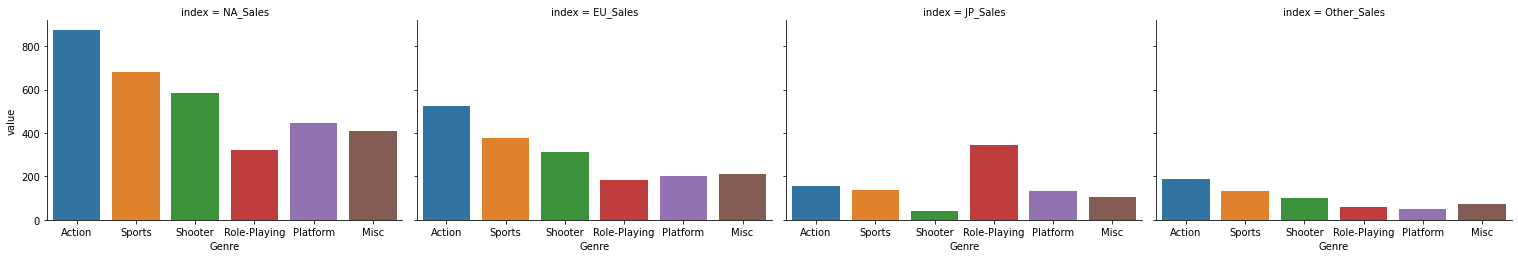

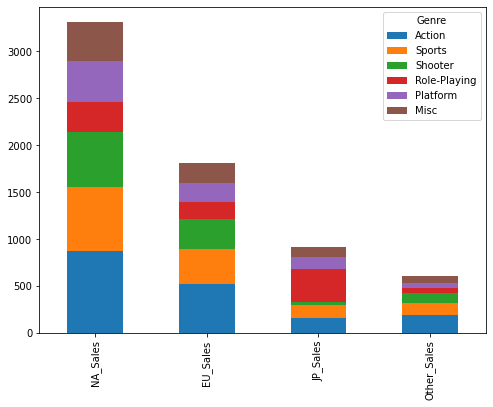

In [14]:
# 판매량이 높은 장르 6개만 추출
loca_genre = df.groupby('Genre').sum().iloc[:-1,1:]
loca_genre = loca_genre.sort_values('Total_Sales',ascending=False)
loca_genre = loca_genre.iloc[:6,:-1]

# 시각화를 위한 전처리
loca_genre_T = loca_genre.T
loca_genre_T.reset_index(inplace=True)
loca_genre_T_tidy = loca_genre_T.melt(id_vars = 'index', value_vars = loca_genre_T.columns[1:])

# 시각화
import seaborn as sns
lg = sns.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', data = loca_genre_T_tidy, height = 3.5, aspect = 1.5);
# ax = lg.facet_axis(0,0)
# for p in ax.patches:
#   ax.text(p.get_x() + 0.1,
#           p.get_height() * 1.02,
#           round(p.get_height(),0),
#           color = 'black',
#           size = 'large',
#           rotation = 'horizontal')

loca_genre.T.plot.bar(stacked=True,figsize=(8,6));

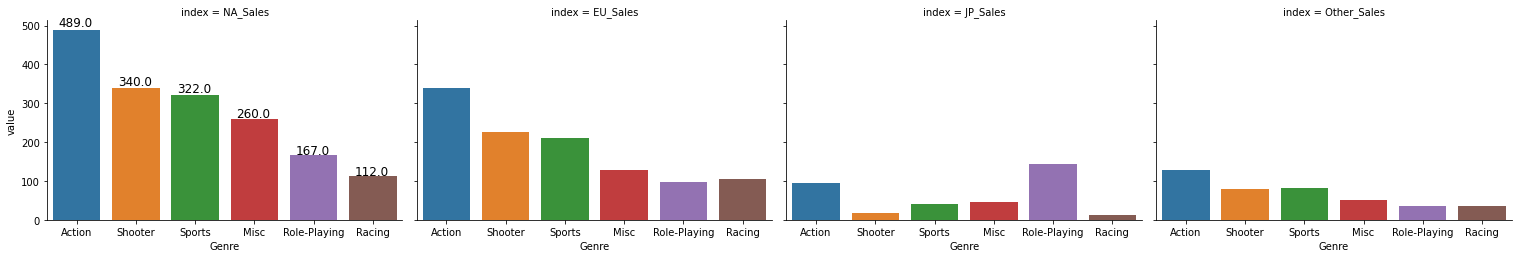

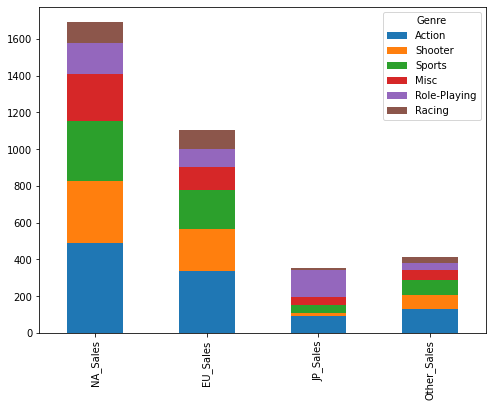

In [15]:
yg_new = df[df.Year >2006]
yg_new = yg_new.groupby('Genre').sum().iloc[:-1,1:]
yg_new = yg_new.sort_values('Total_Sales',ascending=False)
yg_new = yg_new.iloc[:6,:-1]

# 시각화를 위한 전처리
yg_new_T = yg_new.T
yg_new_T.reset_index(inplace=True)
yg_new_T_tidy = yg_new_T.melt(id_vars = 'index', value_vars = yg_new_T.columns[1:])

# 시각화
import seaborn as sns
lg = sns.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', data = yg_new_T_tidy, height = 3.5, aspect = 1.5);
ax = lg.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'large',
          rotation = 'horizontal')

yg_new.T.plot.bar(stacked=True,figsize=(8,6));


In [16]:
loca_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Sports,680.52,376.48,135.37,134.67
Shooter,581.92,313.05,38.28,102.65
Role-Playing,319.54,183.58,344.95,56.96
Platform,446.44,201.61,130.65,51.53
Misc,408.05,212.36,105.27,74.04


#####**3. 장르와 플랫폼 관계 시각화**
[NA, EU, Others]
- Top3 
- 최하위

[JP]
- Top

In [17]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


In [18]:
genre_platform = pd.DataFrame(df.pivot_table(index='Genre',columns='Platform',values='Name',aggfunc=['count'], fill_value=0))
headlst = df.pivot_table(index='Genre',columns='Platform',values='Name',aggfunc=['count'], fill_value=0)
headlst = list(headlst.columns)
head = []
for i in headlst:
  head.append(i[1])
genre_platform.columns = head
genre_platform['All'] = genre_platform.sum(axis=1)
genre_platform.sort_values('All',ascending=False,inplace=True)
genre_platform = genre_platform.iloc[:,:-1]
genre_platform.loc['All'] = genre_platform.sum()
genre_platform.sort_values(by = 'All',ascending=False,axis=1,inplace=True)
genre_platform = genre_platform.iloc[:6,:10]
genre_platform

,DS,PS2,PS3,Wii,X360,PSP,PS,PC,XB,GBA
Genre,,,,,,,,,,
Action,343,347,376,237,324,221,156,164,155,167
Sports,148,398,213,261,220,135,222,49,168,88
Misc,392,221,124,278,126,106,76,24,46,110
Role-Playing,200,186,119,35,76,191,96,104,23,72
Shooter,42,160,156,65,203,37,96,148,131,40
Adventure,239,195,74,84,47,213,68,65,26,37


## 연도별 게임의 트렌드가 있을까?
0. 시간에 따른 지역별 매출 변화
1. 연도별 장르 트렌드
2. 연도별 플랫폼 트렌드
3. 연도별 판매량이 높은 게임



##### 0. 시간에 따른 지역별 매출 변화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


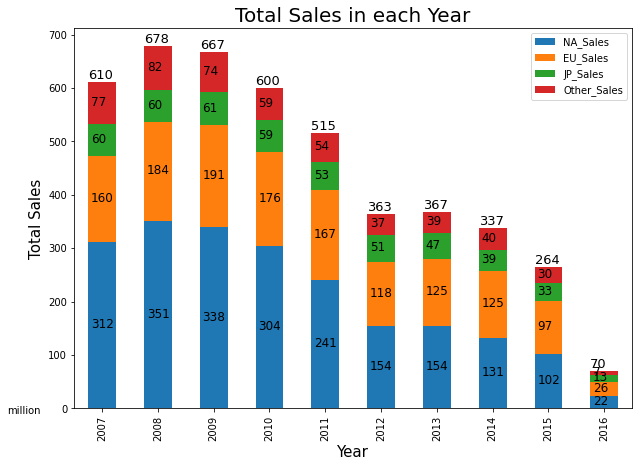

In [25]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


# 연도 x 장르 데이터 생성
year_loca = df.groupby('Year').sum()
year_loca = year_loca.iloc[-12:-2,:-1]
yl_graph = year_loca

yl_graph.plot.bar(stacked=True,figsize=(10,7))
plt.title('Total Sales in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yl_graph.index)):
  plt.text(i-0.25,yl_graph.iloc[i,:].sum()+6,int(yl_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

for i in range(len(yl_ind)):
  sum = 0
  value = 0
  for j in range(len(yl_col)):
    sum += yl_graph.iloc[i,j]
    value =int(yl_graph.iloc[i,j])
    plt.text(x[i]-0.2,sum - (yl_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

In [26]:
yl_graph100[0,0]

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


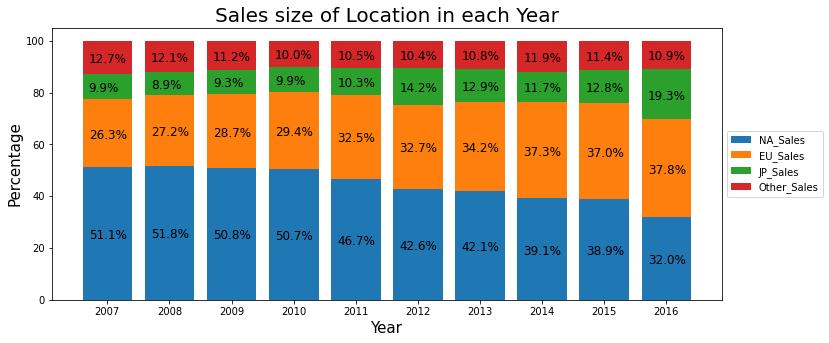

In [24]:
from matplotlib import pyplot as plt
import numpy as np

yl_ind = yl_graph.index
yl_col = yl_graph.columns

yl_graph100 = pd.DataFrame(index = yl_ind, columns=yl_col)
yl_graph100
for i in range(len(yl_ind)):
  yl_graph100.iloc[i] = yl_graph.iloc[i]/yl_graph.iloc[i].sum()

yl_graph100

topics = yl_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yl_col)):
  plt.bar(x,yl_graph100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yl_graph100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Sales size of Location in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yl_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yl_ind)):
  sum = 0
  value = 0
  for j in range(len(yl_col)):
    sum += yl_graph100.iloc[i,j]*100
    value =round(yl_graph100.iloc[i,j]*100,2)
    plt.text(x[i]-0.3,sum - (yl_graph100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

In [ ]:
Syg_graph

##### 1. 연도별 장르 트렌드

**[chi-square test]**

귀무가설: 연도와 장르는 독립적이다.


> p값 (0.0)은 0.05보다 작으므로 귀무가설을 기각한다.

> 즉, **연도와 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다

In [27]:
from scipy.stats import chi2_contingency

# 연도 x 장르 데이터 생성
year_genre = pd.DataFrame(df.pivot_table(index='Year',columns='Genre',values='Total_Sales',aggfunc=['sum'], fill_value=0, margins=True))

# chi-square test 실행
year_genre_chi2 = chi2_contingency(year_genre,correction=False)
print('year_genre chi-square test, pvalue:', year_genre_chi2[1])


year_genre chi-square test, pvalue: 0.0


**[연도별 장르 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

> 최근 10년간 장르 순위: Action - Shooter - Sports - Misc - Role-Playing

> 최근 10년 중 판매량 1위인 **Action** 장르는 2012~2013년 가장 인기가 많았고, **매년 인기 장르 1위**를 기록하였다.

> 판매량 2위의 **Shooter** 장르는 2016년이 2007년 대비 2배 이상의 인기를 보였고, **매년 증가**하는 추세이다.

> 판매량 4위의 **Misc** 장르는 2010년을 제외하고 **매년 판매량이 감소**하였으며, 2016년에는 1.6%를 기록했다.

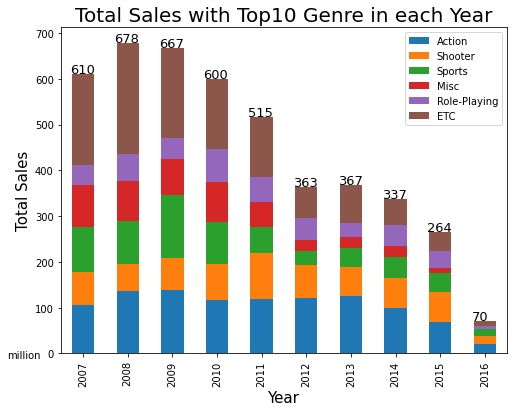

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 최근 10년치의 자료만 가져옴
yg_10year = year_genre.iloc[-13:-3,:-1]

yg_10year_head = []
for i in range(len(yg_10year.columns)):
  yg_10year_head.append(yg_10year.columns[i][1])
yg_10year.columns = yg_10year_head

# 10년동안 가장 많은 platform sales를 기준으로 정렬
yg_10year.loc['All'] = yg_10year.sum()
yg_10year.sort_values(by='All',axis=1,ascending=False, inplace=True)

yg_graph = yg_10year.iloc[:-1,:5]
yg_graph['ETC'] = yg_10year.iloc[:-1,5:].sum(axis=1)


yg_graph.plot.bar(stacked=True,figsize=(8,6))
plt.title('Total Sales with Top10 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yg_graph.index)):
  plt.text(i-0.3,yg_graph.iloc[i,:].sum()+2,int(yg_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

plt.show();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


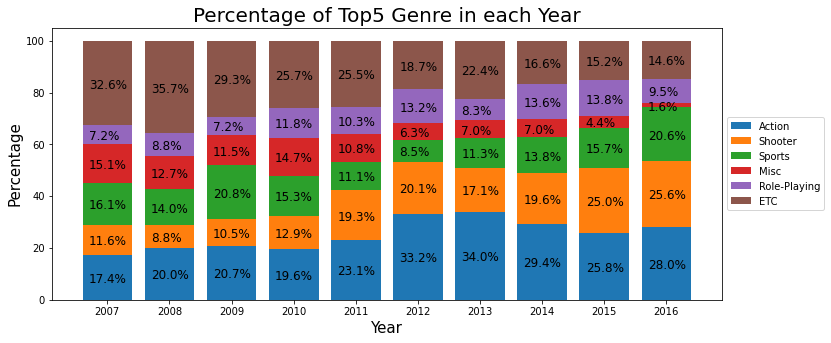

In [29]:
from matplotlib import pyplot as plt
import numpy as np

yg_ind = yg_graph.index
yg_col = yg_graph.columns

yg_graph_100 = pd.DataFrame(index = yg_ind, columns=yg_col)
yg_graph_100
for i in range(len(yg_ind)):
  yg_graph_100.iloc[i] = yg_graph.iloc[i]/yg_graph.iloc[i].sum()

yg_graph_100



topics = yg_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yg_col)):
  plt.bar(x,yg_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yg_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yg_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yg_ind)):
  sum = 0
  value = 0
  for j in range(len(yg_col)):
    sum += yg_graph_100.iloc[i,j]*100
    value =round(yg_graph_100.iloc[i,j]*100,2)
    plt.text(x[i]-0.3,sum - (yg_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

##### 2. 연도별 플렛폼 트렌드

**[chi-square test]**

귀무가설: 연도와 플랫폼는 독립적이다.

> p값 (0.0)은 0.05보다 작으므로 귀무가설을 기각한다.

> 즉, **연도와 플랫폼은 독립적이지 않고 연관성이 있다**고 할 수 있다

In [30]:
from scipy.stats import chi2_contingency

# 연도 x 플랫폼 데이터 생성
year_platform = pd.DataFrame(df.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0, margins=True))
year_platform = year_platform.iloc[1:-3,:-1]
# chi-square test 실행
year_platform_chi2 = chi2_contingency(year_platform,correction=False)
print('year_platform chi-square test, pvalue:', year_platform_chi2[1])

year_platform chi-square test, pvalue: 0.0


**[연도별 플랫폼 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

> **Wii, DS**는 2007~2010년까지 전성기였다.

> **PS3, X360**은 2010~2013년에 50% 이상의 판매율을 보였다.

> **3DS**는 2011년에 등장하여 매년 약 10% 이상의 점유율을 보였다.

> **PS4**는 2013년에 등장하여 PS3에 이어 2014년부터 압도적인 점유율을 보였다.

> **XOne**은 2013년에 등장하여 2014년부터 PS4에 이어 두번째 점유율을 보였다.


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


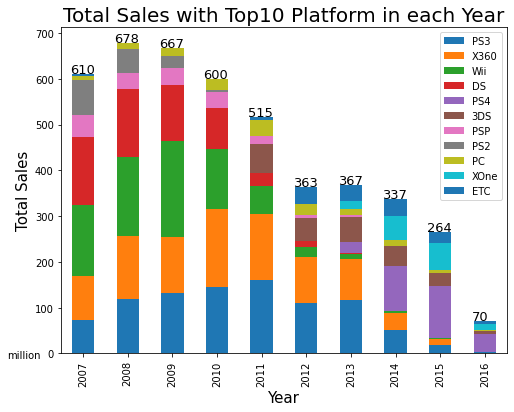

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 최근 10년치의 자료만 가져옴
yp_10year = year_platform.iloc[-10:,:]

yp_10year_head = []
for i in range(len(yp_10year.columns)):
  yp_10year_head.append(yp_10year.columns[i][1])
yp_10year.columns = yp_10year_head

# 10년동안 가장 많은 platform sales를 기준으로 정렬
yp_10year.loc['All'] = yp_10year.sum()
yp_10year.sort_values(by='All',axis=1,ascending=False, inplace=True)

yp_graph = yp_10year.iloc[:-1,:10]
yp_graph['ETC'] = yp_10year.iloc[:-1,10:].sum(axis=1)


yp_graph.plot.bar(stacked=True,figsize=(8,6))
plt.title('Total Sales with Top10 Platform in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yp_graph.index)):
  plt.text(i-0.3,yp_graph.iloc[i,:].sum()+2,int(yp_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

plt.show();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


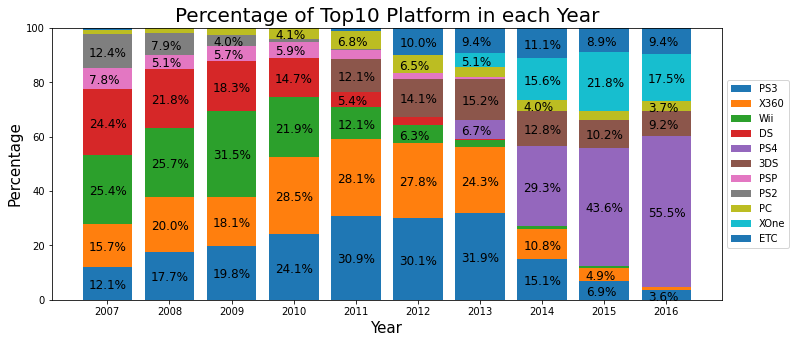

In [32]:
from matplotlib import pyplot as plt
import numpy as np

yp_ind = yp_graph.index
yp_col = yp_graph.columns

yp_graph_100 = pd.DataFrame(index = yp_ind, columns=yp_col)
yp_graph_100
for i in range(len(yp_ind)):
  yp_graph_100.iloc[i] = yp_graph.iloc[i]/yp_graph.iloc[i].sum()


topics = yp_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yp_col)):
  plt.bar(x,yp_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yp_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top10 Platform in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yp_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yp_ind)):
  sum = 0
  value = 0
  for j in range(len(yp_col)):
    sum += yp_graph_100.iloc[i,j]*100
    value =round(yp_graph_100.iloc[i,j]*100,2)
    if value <= 3.5:
      continue
    else: 
      plt.text(x[i]-0.3,sum - (yp_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

In [33]:
yg_graph

,Action,Shooter,Sports,Misc,Role-Playing,ETC
Year,,,,,,
2007,105.99,70.88,98.24,92.28,43.86,199.19
2008,135.46,59.51,95.24,86.18,59.69,242.41
2009,138.32,69.84,138.59,76.90,47.96,195.49
2010,117.50,77.44,92.02,88.40,70.56,154.44
2011,119.00,99.35,57.06,55.77,53.32,131.43
2012,120.81,72.84,30.90,22.93,47.77,68.05
2013,125.21,62.73,41.54,25.66,30.54,82.30
2014,99.01,65.99,46.64,23.73,45.89,55.84
2015,68.25,66.12,41.49,11.66,36.43,40.31


##### 3. 연도별 판매량이 높은 게임 (21.08.01 진행중)

**[연도별 판매량 시각화]**


In [97]:
df2 = df[(df.Year >2006) & (df.Year < 2017)]
df2 = df2[(df2.Genre == "Action") | (df2.Genre == "Shooter")]
my = pd.DataFrame(df2.pivot_table(index='Year',columns='Name',values='Total_Sales',aggfunc=['sum'], fill_value=0,margins=True))
head = []
for name in my.columns:
  head.append(name[1])
my.columns = head
# my.loc['All'] = my.sum(axis=0)

mynew = my.copy()
mynew = mynew.T
mynew = mynew[mynew.All >1.38].T
my = mynew

# # my = my.iloc[:,:40]
# print(my.columns)
my['top in total year'] = my.iloc[:,:-1].sum(axis=1)
my['%'] = round(my["top in total year"] / my['All'] * 100,2)
my.sort_values(by='All',ascending=False,inplace=True,axis=1)
# my.fillna(0)
my


,All,top in total year,%,Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Black Ops,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 2,Call of Duty: Advanced Warfare,Grand Theft Auto IV,Call of Duty 4: Modern Warfare,Battlefield 3,FIFA Soccer 13,Call of Duty: World at War,LEGO Star Wars: The Complete Saga,Battlefield 4,Assassin's Creed IV: Black Flag,Assassin's Creed III,Red Dead Redemption,Destiny,Halo 3,Pokemon HeartGold/Pokemon SoulSilver,Star Wars Battlefront (2015),Assassin's Creed II,Batman: Arkham City,The Last of Us,Star Wars: The Force Unleashed,Halo: Reach,LEGO Marvel Super Heroes,Halo 4,LEGO Indiana Jones: The Original Adventures,Watch Dogs,Assassin's Creed: Revelations,LEGO Batman: The Videogame,Resident Evil 5,Far Cry 4,LEGO Harry Potter: Years 1-4,Batman: Arkham Asylum,...,Hannah Montana: Spotlight World Tour,Terraria,Sniper Elite 3,[Prototype 2],Aliens: Colonial Marines,Gears of War: Judgment,Bully: Scholarship Edition,No Man's Sky,Medal of Honor Heroes 2,Hannah Montana: Music Jam,Kingdom Hearts 3D: Dream Drop Distance,Mad Max (2015),Guinness World Records: The Videogame,Indiana Jones and the Staff of Kings,The Godfather II,Dead Rising 3,Resident Evil: The Umbrella Chronicles,Call of Juarez: Bound in Blood,The Lord of the Rings: Conquest,Call of Duty: Modern Warfare: Reflex Edition,Kane & Lynch: Dead Men,Payday 2,Resistance 3,Phineas and Ferb: Across the 2nd Dimension,The Incredible Hulk,PlayStation All-Stars Battle Royale,Assassin's Creed III: Liberation,X-Men Origins: Wolverine - Uncaged Edition,Spider-Man: Friend or Foe,The House of the Dead 2 & 3 Return,SpongeBob's Truth or Square (US sales),The Amazing Spider-Man 2 (2014),Turok,Monsters vs. Aliens,Alan Wake,Ninja Gaiden Sigma,Manhunt 2,Mini Ninjas,Dead Island: Riptide,Metroid: Other M
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,176.87,139.00,78.59,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,18.26,0.00,0.00,0.00,15.73,0.00,0.0,0.0,0.00,0.00,12.14,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.59,1.58,0.00,0.00,0.00,0.00,0.00,0.00,1.54,0.00,0.00,0.00,1.51,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.47,0.00,0.00,0.00,0.00,0.00,0.00,1.15,1.41,0.00,0.00,0.00
2008,194.97,157.78,80.93,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,21.61,0.00,0.00,0.00,15.88,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10.21,0.00,0.00,0.00,9.69,0.0,0.0,9.18,0.00,0.00,0.00,0.00,...,0.28,0.00,0.00,0.00,0.00,0.00,1.61,0.0,0.00,0.00,0.00,0.00,1.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.48,0.00,0.00,0.00,0.00,1.46,0.00,0.00,1.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2009,208.16,163.01,78.31,0.00,0.00,0.00,0.00,0.00,0.0,25.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,11.9,0.0,10.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,8.69,0.00,0.00,8.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.55,1.55,0.00,0.00,1.54,1.53,1.52,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.47,0.00,0.00,1.45,0.00,0.00,1.44,0.00,0.00,0.00,1.41,0.00,0.00
2010,194.94,147.38,75.60,0.00,0.00,0.00,29.41,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,12.93,0.00,0.00,0.0,0.0,0.57,0.00,0.00,0.00,9.87,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,8.52,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,1.41
2011,218.35,172.10,78.82,0.00,30.84,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,17.37,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,10.80,0.00,0.00,0.00,0.00,0.00,0.00,0.0,9.2,0.00,0.00,0.00,0.00,0.00,...,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.5,1.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2012,193.65,153.90,79.47,0

In [203]:
my2 = pd.DataFrame(df2.pivot_table(index='Year',columns='Name',values='Total_Sales',aggfunc=['sum'], fill_value=0,margins=True))
head = []
for name in my2.columns:
  head.append(name[1])
my2.columns = head
my2.sort_values(by='All',ascending=False,inplace=True,axis=1)

my2lst = []
my3lst = []
for i in range(len(my2.index)):
  a = list(my2.iloc[i,1:])
  ab = []
  for j in a:
    if j > 0.000001 :
      ab.append(j)
      ab.sort(reverse=True)
  my2lst.append(np.sum(ab[:5]))
  my3lst.append(min(ab[:5]))


my3lst = my3lst[:-3]
my2['top in total year'] = my2lst
my2['%'] = round(my2["top in total year"] / my2['All'] * 100,2)

my2.sort_values(by='All',ascending=False,inplace=True,axis=1)
print(my3lst)
my2

[5.17, 9.179999999999998, 8.07, 7.17, 7.58, 7.45, 9.860000000000001, 8.660000000000002]


,All,top in total year,Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Black Ops,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 2,Call of Duty: Advanced Warfare,Grand Theft Auto IV,Call of Duty 4: Modern Warfare,Battlefield 3,FIFA Soccer 13,Call of Duty: World at War,LEGO Star Wars: The Complete Saga,Battlefield 4,Assassin's Creed IV: Black Flag,Assassin's Creed III,Red Dead Redemption,Destiny,Halo 3,Pokemon HeartGold/Pokemon SoulSilver,Star Wars Battlefront (2015),Assassin's Creed II,Batman: Arkham City,The Last of Us,Star Wars: The Force Unleashed,%,Halo: Reach,LEGO Marvel Super Heroes,Halo 4,LEGO Indiana Jones: The Original Adventures,Watch Dogs,Assassin's Creed: Revelations,LEGO Batman: The Videogame,Resident Evil 5,Far Cry 4,LEGO Harry Potter: Years 1-4,Batman: Arkham Asylum,...,Hakuoki: Reimeiroku DS,Breach,Trine,Resident Evil 5 HD,Chokkan! Asonde Relaxuma,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,Assault Suit Leynos,Bullet Soul: Tama Tamashii,The Amazing Spider-Man (DS & Mobile Versions),Paragon,Tenchu San Portable,Teenage Mutant Ninja Turtles (3DS),Tsukigime Ranko's Longest Day,Coven and Labyrinth of Refrain,This War of Mine,Collar x Malice,Super Battle For Money Sentouchuu: Kyuukyoku no Shinobu to Battle Player Choujou Kessen!,Original Frisbee Disc Sports: Ultimate & Golf,Mushi Bugyou,Period Cube: Torikago no Amadeus,Bunmei Kaika: Aoiza Ibunroku Saien,The Wild West,Norn + Nonette: Last Era,Azure Striker Gunvolt: Striker Pack,Hakuoki: Reimeiroku - Omouhase Kara,Tsuyo Kiss 3 Portable,God Eater Off Shot: Tachibana Sakuya-hen Twin Pack & Animation Vol.7,Koi Sentai Love & Peace the P.S.P: Power Zenkai! Special Youso Tenkomori de Portable Ka Daisakusen de Aru!,God Eater Off Shot: Soma Shikkuzaru-hen Twin Pack & Animation Vol.4,Gears of War,"Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki",Unending Bloody Call,SoulCalibur Legends (JP sales),Dance with Devils,San-X: Chara Sagashi Land,Caladrius,Nintendogs and Cats Golden Retriever and New Friends,Bakumatsu Rock,Teenage Mutant Ninja Turtles,Paranormal Pursuit: The Gifted One
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,176.87,58.42,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,18.26,0.00,0.00,0.00,15.73,0.00,0.0,0.0,0.00,0.00,12.14,0.0,0.0,0.00,0.00,0.00,0.00,33.03,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00
2008,194.97,66.57,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,21.61,0.00,0.00,0.00,15.88,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10.21,34.14,0.00,0.00,0.00,9.69,0.0,0.0,9.18,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2009,208.16,64.58,0.00,0.00,0.00,0.00,0.00,0.0,25.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,11.9,0.0,10.82,0.00,0.00,0.00,31.02,0.00,0.00,0.00,0.00,0.0,0.0,0.00,8.69,0.00,0.00,8.07,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010,194.94,67.90,0.00,0.00,0.00,29.41,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,12.93,0.00,0.00,0.0,0.0,0.57,0.00,0.00,0.00,34.83,9.87,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,8.52,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011,218.35,75.79,0.00,30.84,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,17.37,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,10.80,0.00

In [234]:
# mynew2 = my2.copy()
# mynew2 = mynew2.T
# mynew2 = mynew2[mynew2.All > min(my3lst)].T
# my2 = mynew2
# my2

# mynew3 = my2.copy()
# mynew3 = mynew3.T
# # mynew3 = mynew3[mynew3.All >min(my3lst)].T
# # my3 = mynew3
# mynew3.drop(mynew3.columns[1:],inplace=True,axis=1)
# mynew3.sort_values(mynew3.columns[0],ascending=False).head(11)

mynew3 = my2.copy()
best_lst = pd.DataFrame()
for i in range(len(mynew3.index[:-1])):
  a = pd.DataFrame(mynew3.iloc[i,:].sort_values(ascending=False).index[3:8])
  best_lst = pd.concat([best_lst,a],axis=1)
best_year_head = mynew3.index[:-1]
best_lst.columns = best_year_head
best_lst
# mynew3

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Call of Duty 4: Modern Warfare,Grand Theft Auto IV,Call of Duty: Modern Warfare 2,Call of Duty: Black Ops,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Grand Theft Auto V,Call of Duty: Advanced Warfare,Call of Duty: Black Ops 3,Tom Clancy's The Division
1,LEGO Star Wars: The Complete Saga,Call of Duty: World at War,Pokemon HeartGold/Pokemon SoulSilver,Red Dead Redemption,Battlefield 3,FIFA Soccer 13,Call of Duty: Ghosts,Grand Theft Auto V,Star Wars Battlefront (2015),Uncharted 4: A Thief's End
2,Halo 3,Star Wars: The Force Unleashed,Assassin's Creed II,Halo: Reach,Batman: Arkham City,Assassin's Creed III,Battlefield 4,Destiny,Batman: Arkham Knight,Far Cry: Primal
3,The Simpsons Game,LEGO Indiana Jones: The Original Adventures,Resident Evil 5,LEGO Harry Potter: Years 1-4,Assassin's Creed: Revelations,Halo 4,Assassin's Creed IV: Black Flag,Watch Dogs,Metal Gear Solid V: The Phantom Pain,Overwatch
4,The Legend of Zelda: Phantom Hourglass,LEGO Batman: The Videogame,Batman: Arkham Asylum,Battlefield: Bad Company 2,LEGO Star Wars III: The Clone Wars,Far Cry 3,LEGO Marvel Super Heroes,Far Cry 4,LEGO Jurassic World,LEGO Marvel's Avengers


In [122]:
import numpy as np

a = list(my2.iloc[0,1:])
ab = []
# print(len(a))
for i in a:
  if i > 0.0001:
    ab.append(i)

np.sum(ab[:30])

127.09

In [36]:
namelst = []
for name in year_name.columns:
  if (':' in name) or (name[:-1].isdigit()):
    namelst.append(name)
namelst.sort()
namelst

NameError: ignored